### ДЗ 2. CNN на датасете CIFAR10

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, MaxPool2D, AveragePooling2D, Dropout, Reshape
from tensorflow.keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

import tensorflow_datasets as tfds

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [141]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

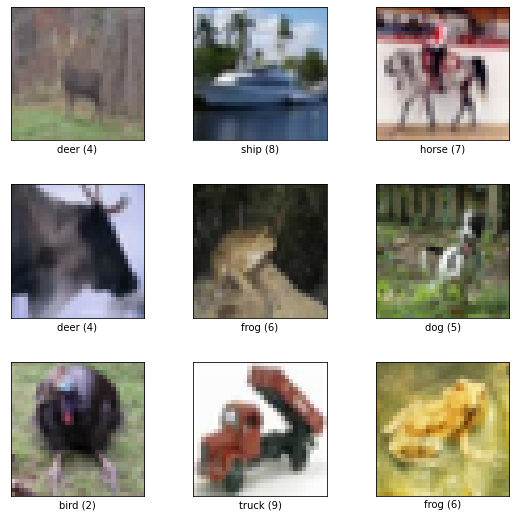

In [142]:
fig = tfds.show_examples(ds_train, ds_info)

In [143]:
# Так, у нас есть CIFAR10. Можно начинать

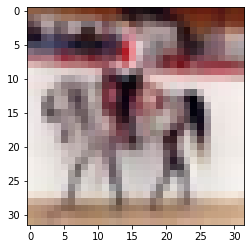

In [144]:
# Какая нибудь картинка из трейна
i = iter(ds_train).next()
plt.imshow(i[0])

In [145]:
# Таргет
i[1].numpy()

7

In [146]:
# лошадка ))

In [147]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

In [148]:
# Нормализация, рандомизация, разбиение на батчи и кеширование
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [149]:
ds_train = ds_train.cache()

In [150]:
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

In [151]:
ds_train = ds_train.batch(64)

In [152]:
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [153]:
# То-же для теста (за исключением шафла)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [162]:
# Cтроим CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), padding="same"),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [163]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='SGD', metrics=SparseCategoricalAccuracy())

In [164]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)        

In [165]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 2.2704 - sparse_categorical_accuracy: 0.1261 - val_loss: 2.1099 - val_sparse_categorical_accuracy: 0.2231
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 2.0092 - sparse_categorical_accuracy: 0.2650 - val_loss: 1.8890 - val_sparse_categorical_accuracy: 0.3116
Epoch 3/50
782/782 [==============================] - 7s 8ms/step - loss: 1.8332 - sparse_categorical_accuracy: 0.3404 - val_loss: 1.7017 - val_sparse_categorical_accuracy: 0.3791
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6967 - sparse_categorical_accuracy: 0.3841 - val_loss: 1.7276 - val_sparse_categorical_accuracy: 0.3734
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 1.6028 - sparse_categorical_accuracy: 0.4183 - val_loss: 1.5472 - val_sparse_categorical_accuracy: 0.4315
Epoch 6/50
782/782 [==============================] - 7s 8ms/step - loss: 1.5107 - sparse_categorica

782/782 [==============================] - 7s 9ms/step - loss: 0.4244 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.9290 - val_sparse_categorical_accuracy: 0.7196
Epoch 47/50
782/782 [==============================] - 7s 9ms/step - loss: 0.4241 - sparse_categorical_accuracy: 0.8490 - val_loss: 0.6320 - val_sparse_categorical_accuracy: 0.7931
Epoch 48/50
782/782 [==============================] - 7s 9ms/step - loss: 0.4091 - sparse_categorical_accuracy: 0.8548 - val_loss: 0.7075 - val_sparse_categorical_accuracy: 0.7758
Epoch 49/50
782/782 [==============================] - 7s 9ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8589 - val_loss: 0.6417 - val_sparse_categorical_accuracy: 0.7963
Epoch 50/50
782/782 [==============================] - 7s 9ms/step - loss: 0.3797 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.6823 - val_sparse_categorical_accuracy: 0.7826


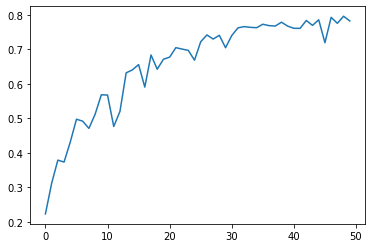

In [166]:
plt.plot(history.history['val_sparse_categorical_accuracy'])

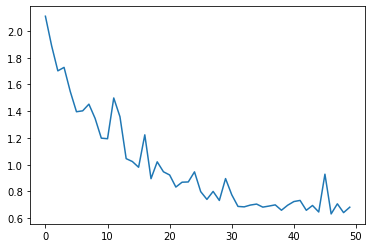

In [167]:
plt.plot(history.history['val_loss'])

In [168]:
# Проверим инференс. Предскажем батчик..

In [169]:
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [179]:
test_batch = iter(ds_test).next()

In [187]:
predicts = np.argmax(model(test_batch[0]), axis=1)

In [188]:
predicts

array([0, 6, 5, 7, 1, 7, 7, 2, 8, 2, 0, 5, 8, 7, 9, 2, 4, 9, 2, 9, 4, 5,
       3, 5, 0, 0, 2, 8, 1, 8, 6, 0, 7, 2, 0, 0, 9, 1, 0, 6, 1, 5, 0, 3,
       3, 0, 2, 5, 5, 7, 7, 3, 4, 1, 0, 5, 2, 7, 2, 5, 2, 3, 0, 2, 1, 5,
       5, 2, 3, 2, 0, 1, 0, 8, 8, 5, 2, 0, 8, 0, 8, 6, 5, 8, 1, 9, 8, 9,
       6, 5, 2, 7, 8, 5, 3, 1, 8, 1, 0, 8, 3, 4, 7, 1, 3, 4, 2, 3, 1, 4,
       2, 3, 7, 8, 1, 4, 4, 8, 9, 1, 2, 5, 1, 4, 2, 2, 4, 0])

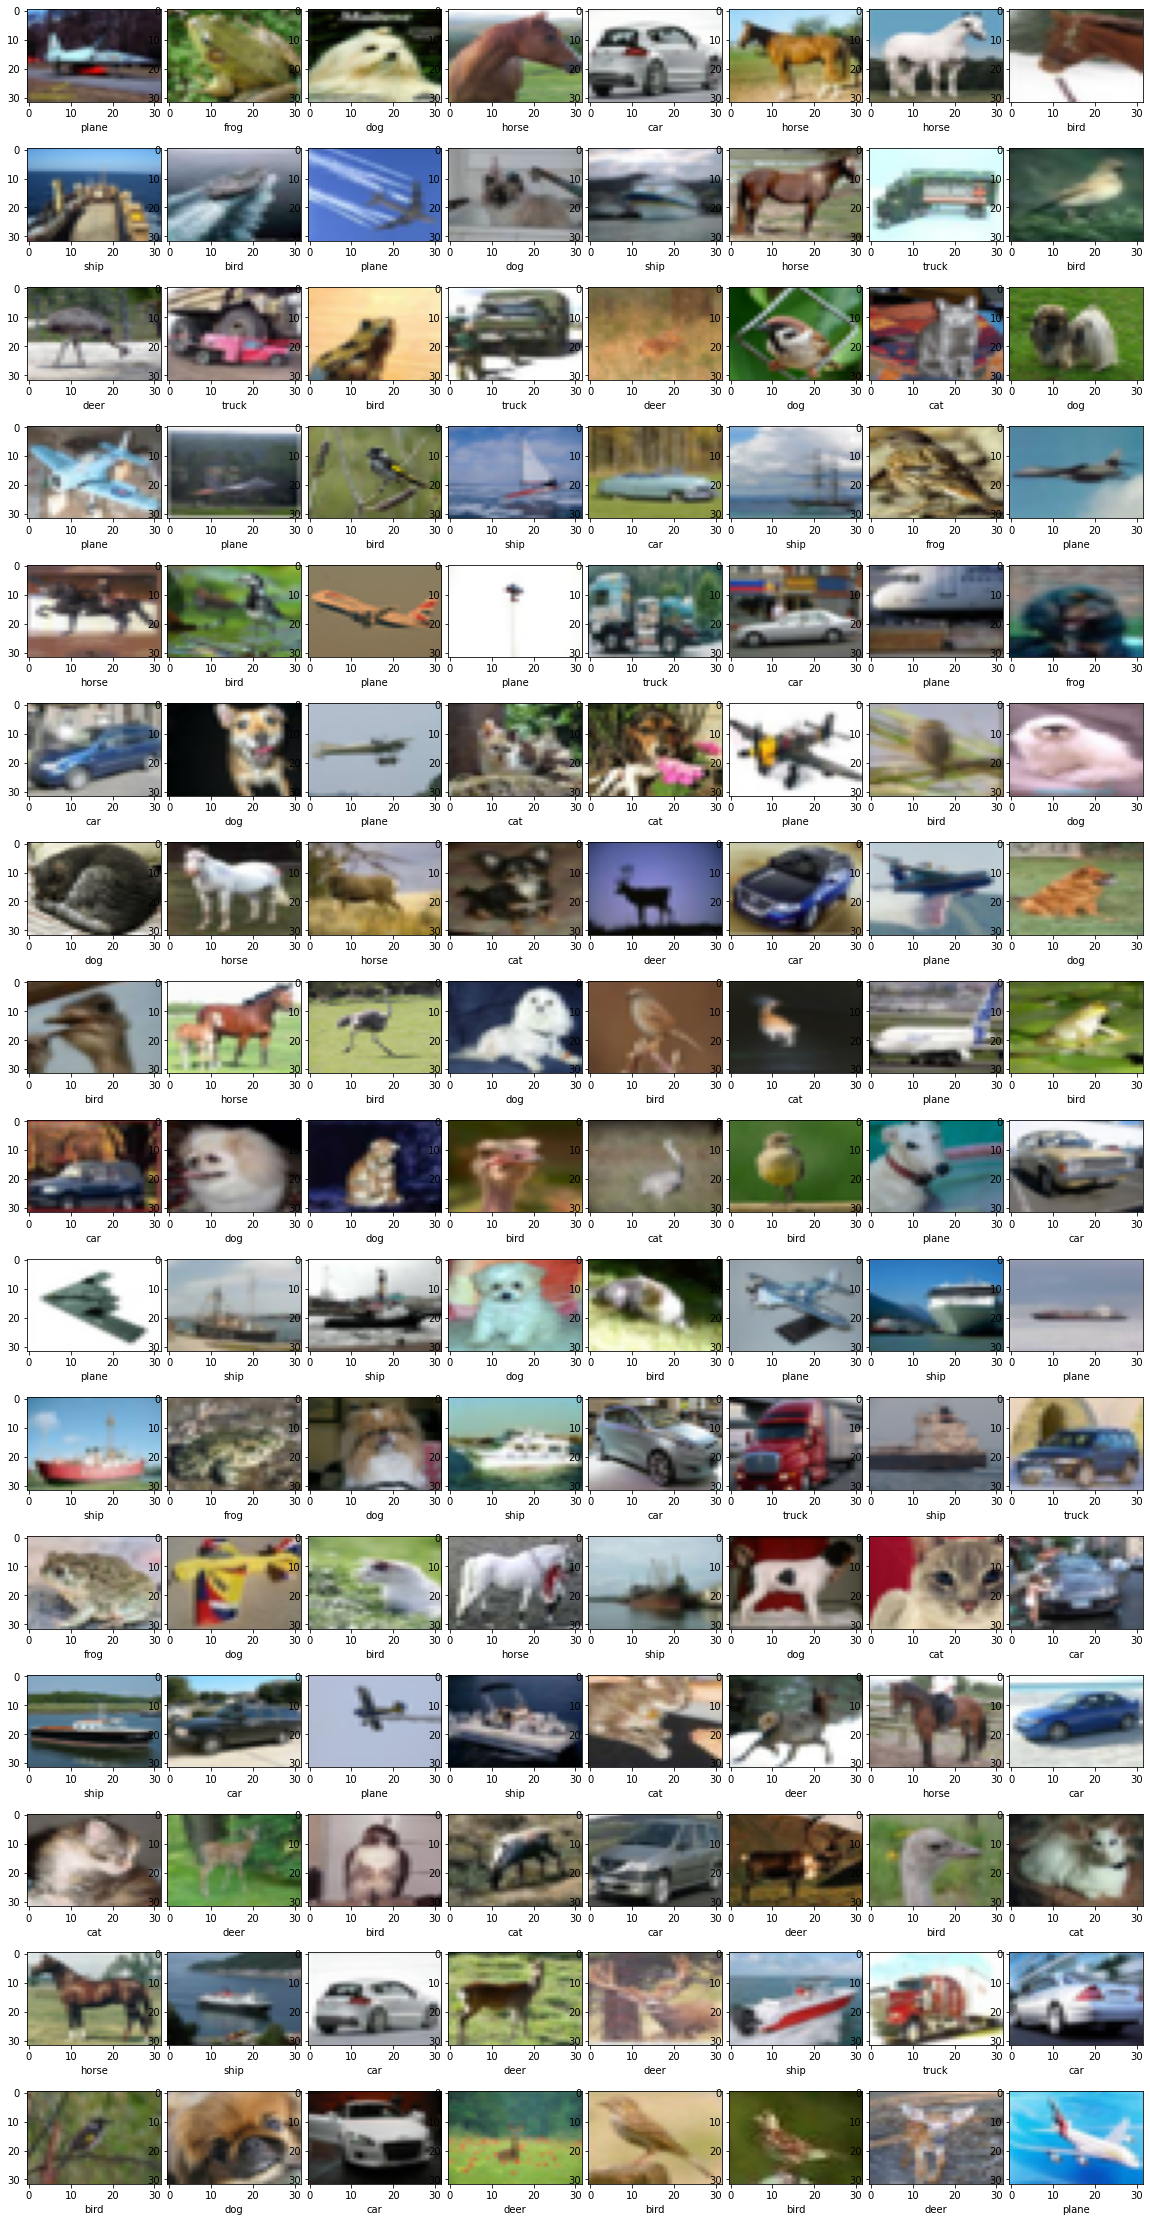

In [202]:
fig, axes = plt.subplots(nrows=16, ncols=8, figsize=(20,40))
for idx, image in enumerate(test_batch[0]):
    row = idx // 8
    col = idx % 8
    axes[row, col].imshow(image, cmap="gray", aspect="auto")
    axes[row, col].set_xlabel(classes[predicts[idx]])
plt.subplots_adjust(wspace=.05, hspace=.5)
plt.show()

In [203]:
# Ну... с какой-то долей успешности )